# Попробовал
- https://nils-olovsson.se/articles/image_smoothing_by_nonlinear_diffusion. Не походит под задачу и работает долго
- https://github.com/alyssaq/hough_transform.git работает долго результат непонятный
- https://answers.opencv.org/question/220762/extract-handwriting-and-print-from-background/
Здесь удалюят задний фон другого цвета. Непонятно как его здесь применить

In [ ]:
filename = '/content/1_23.JPG'
json_filename = '/content/instances_default.json'

In [ ]:
!unzip -o /content/magazine.zip -d /content/

unzip:  cannot find or open /content/magazine.zip, /content/magazine.zip.zip or /content/magazine.zip.ZIP.


# File reading and anootation placing

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2
import json
import numpy as np
import os

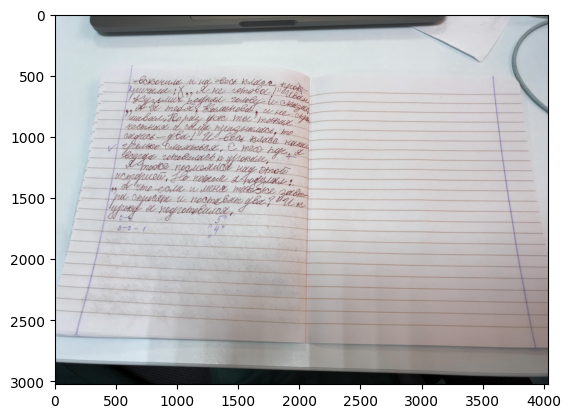

In [ ]:
image = cv2.imread(filename)
plt.imshow(image)
plt.show()

In [ ]:
def get_path_last_seg(path):
  return os.path.basename(os.path.normpath(path))


with open(json_filename) as json_file:
  json_data = json.load(json_file)
  # print(json.dumps(json_data, indent=1))

category_name2id = {category['name']: category['id'] for category in json_data['categories']}
print(f"{category_name2id=}")
image_name2id = {image['file_name']: image['id'] for image in json_data['images']}
print(f"{image_name2id=}")

annotated_image = image.copy()
for annotation in json_data['annotations']:
    if annotation['image_id'] != image_name2id[get_path_last_seg(filename)]: continue

    # Polygon corner points coordinates
    pts = np.array(annotation['segmentation'], np.int32)
    pts = pts.reshape((-1, 1, 2))

    isClosed = True

    # Green color in BGR
    color = (0, 255, 0)

    # Line thickness of 8 px
    thickness = 8

    # Using cv2.polylines() method
    # Draw a Green polygon with
    # thickness of 1 px
    annotated_image = cv2.polylines(annotated_image, [pts],
                          isClosed, color,
                          thickness)
plt.imshow(annotated_image)
cv2.imwrite('annotated_image.jpg', annotated_image)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/instances_default.json'

# Image correction

In [ ]:
img = cv2.imread(filename)
print(f"{img.shape=}")

img.shape=(3024, 4032, 3)


KeyboardInterrupt: 

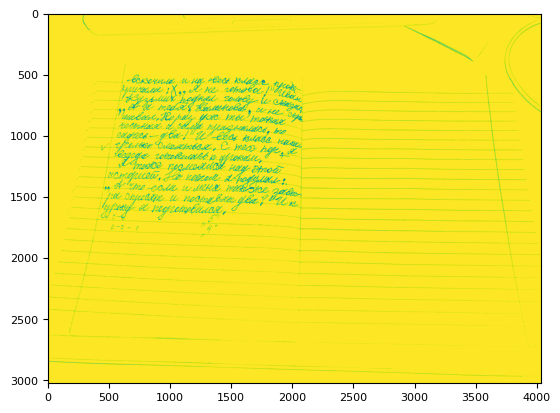

In [ ]:
img = cv2.imread(filename,0)

dilated_img = cv2.dilate(img, np.ones((7,7), np.uint8))

bg_img = cv2.medianBlur(dilated_img, 21)

diff_img = 255 - cv2.absdiff(img, bg_img)

norm_img = diff_img.copy() # Needed for 3.x compatibility
cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

_, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

plt.imshow(thr_img)
plt.show()

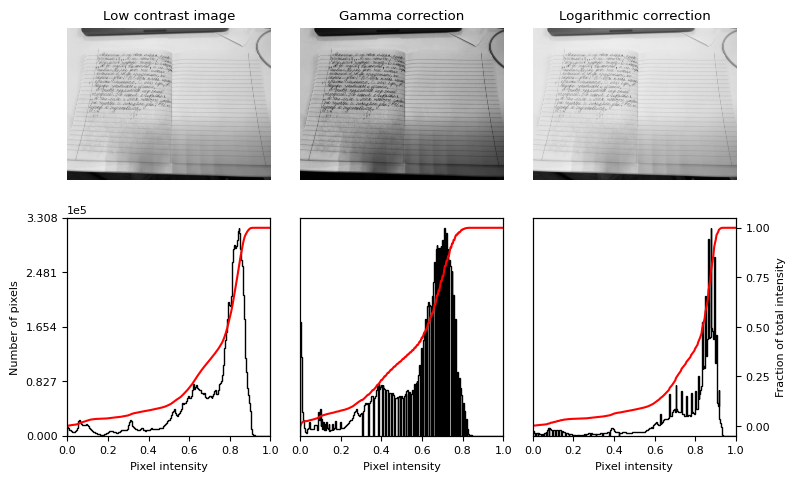

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

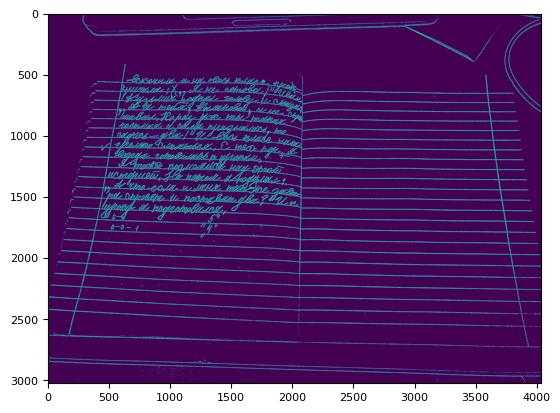

In [ ]:
# image = logarithmic_corrected

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blur = cv2.medianBlur(gray, 5)
edges = cv2.Canny(gray,50,200,apertureSize = 3)

adapt_type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
thresh_type = cv2.THRESH_BINARY_INV
image = cv2.adaptiveThreshold(thr_img, 255, adapt_type, thresh_type, 11, 2)

plt.imshow(image)
plt.savefig("image.png")
plt.show()

slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.0000000000000002
slope=-1.000

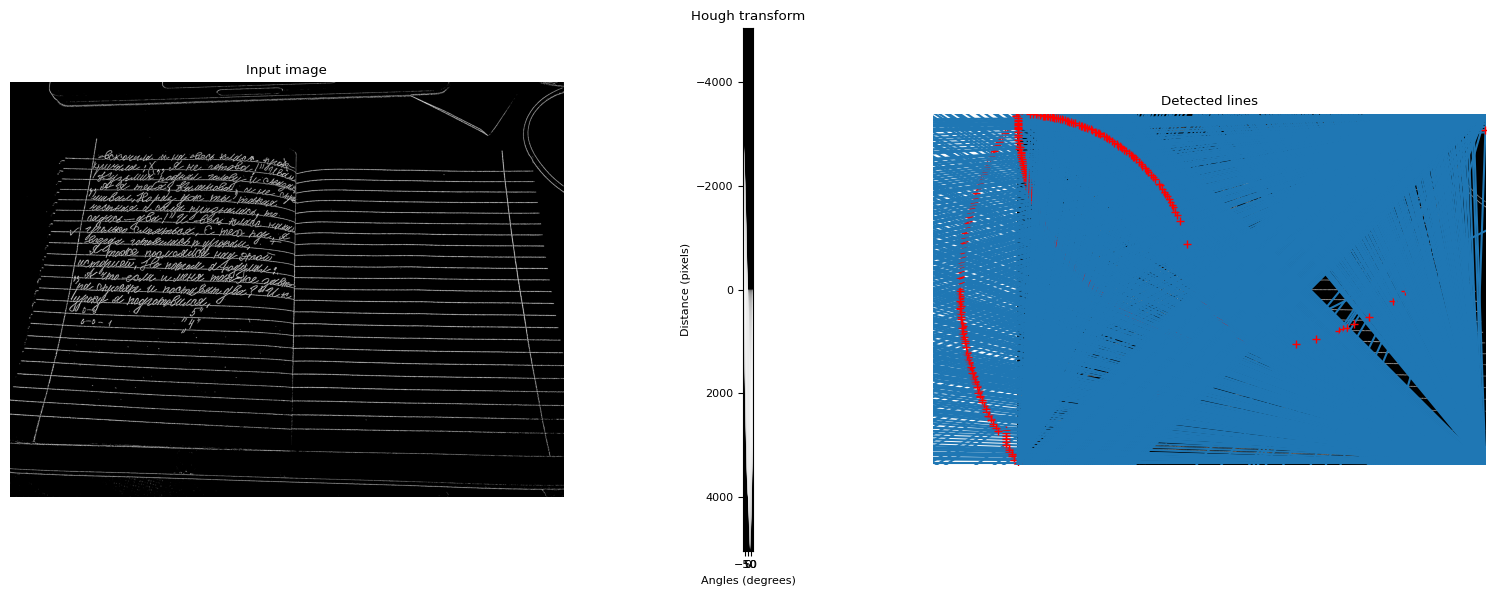

In [ ]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(thr_img, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for idx, (_, angle, dist) in enumerate(zip(*hough_line_peaks(h, theta, d))):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))
    print(f'slope={np.tan(angle + np.pi/2)}')
    # plotting point for image
    ax[2].plot(x0, y0, 'r+')

plt.tight_layout()
plt.savefig('output2.png')
plt.show()

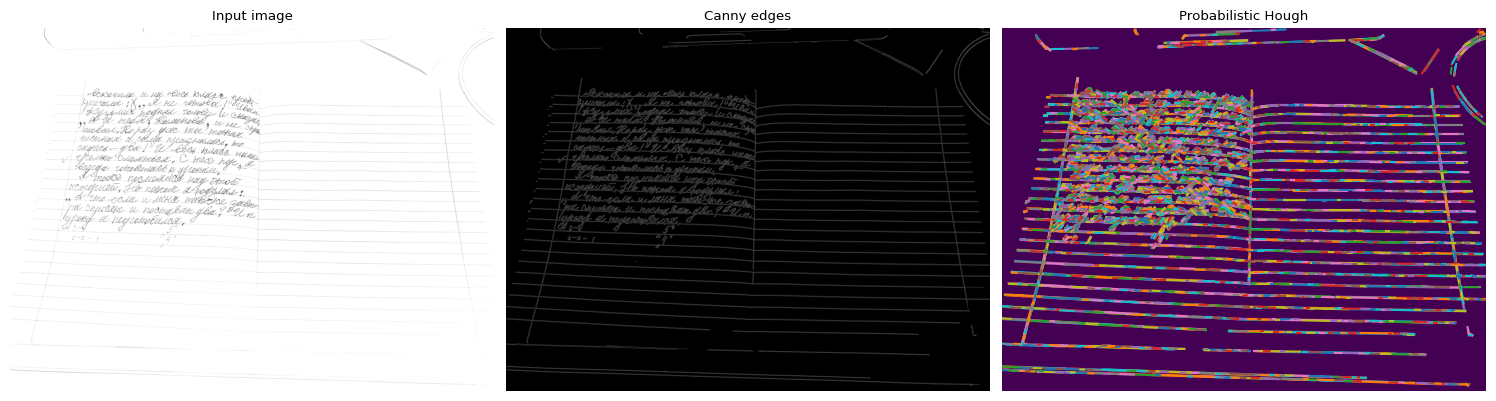

In [ ]:
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform
image = thr_img
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=20, line_length=20,
                                 line_gap=20)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
from collections import defaultdict
def segment_by_angle_kmeans(lines, k=2, **kwargs):
    """Groups lines based on angle with k-means.

    Uses k-means on the coordinates of the angle on the unit circle
    to segment `k` angles inside `lines`.
    """

    # print(f"{lines=}")

    # Define criteria = (type, max_iter, epsilon)
    default_criteria_type = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER
    criteria = kwargs.get('criteria', (default_criteria_type, 10, 1.0))
    flags = kwargs.get('flags', cv2.KMEANS_RANDOM_CENTERS)
    attempts = kwargs.get('attempts', 10)

    # returns angles in [0, pi] in radians
    angles = np.array([line[1] for line in lines])
    # print(f"{angles=}")

    # multiply the angles by two and find coordinates of that angle
    pts = np.array([[np.cos(2*angle), np.sin(2*angle)]
                    for angle in angles], dtype=np.float32)

    # run kmeans on the coords
    labels, centers = cv2.kmeans(pts, k, None, criteria, attempts, flags)[1:]
    labels = labels.reshape(-1)  # transpose to row vec

    # segment lines based on their kmeans label
    segmented = defaultdict(list)
    for i, line in enumerate(lines):
        segmented[labels[i]].append(line)
    segmented = list(segmented.values())
    return segmented

In [ ]:
vertical, horizontal = segment_by_angle_kmeans(list(zip(*hough_line_peaks(h, theta, d))))
vertical

[(2441, 1.5446163880149815, 1492.0),
 (2412, 1.53588974175501, 1929.0),
 (2349, 1.53588974175501, 1757.0),
 (2348, 1.5533430342749535, 483.0),
 (2344, 1.5446163880149815, 1349.0),
 (2331, 1.5446163880149815, 839.0),
 (2321, 1.5446163880149815, 906.0),
 (2291, 1.5271630954950384, 1942.0),
 (2247, 1.53588974175501, 1598.0),
 (2241, 1.5533430342749535, 956.0),
 (2240, 1.5446163880149815, 770.0),
 (2203, 1.5446163880149815, 703.0),
 (2195, 1.5446163880149815, 1191.0),
 (2192, 1.5446163880149815, 1049.0),
 (2189, 1.5446163880149815, 1571.0),
 (2184, 1.5533430342749535, 1319.0),
 (2181, 1.5533430342749535, 883.0),
 (2169, 1.5446163880149815, 1416.0),
 (2169, 1.5533430342749535, 1026.0),
 (2165, 1.5446163880149815, 635.0),
 (2162, 1.5446163880149815, 1740.0),
 (2138, 1.53588974175501, 1676.0),
 (2100, 1.5446163880149815, 979.0),
 (2082, 1.5533430342749535, 550.0),
 (2064, 1.5533430342749535, 747.0),
 (2061, 1.5533430342749535, 1172.0),
 (2055, 1.53588974175501, 1289.0),
 (2046, 1.544616388014

In [ ]:
epsilon = 1e-5

In [ ]:
vertical = [line for line in vertical if abs(line[1]) > 1.5 and abs(abs(line[1]) - 1.5) > epsilon]

In [ ]:
horizontal = [line for line in horizontal if abs(line[1]) < 0.5 and abs(abs(line[1]) - 0.5) > epsilon]

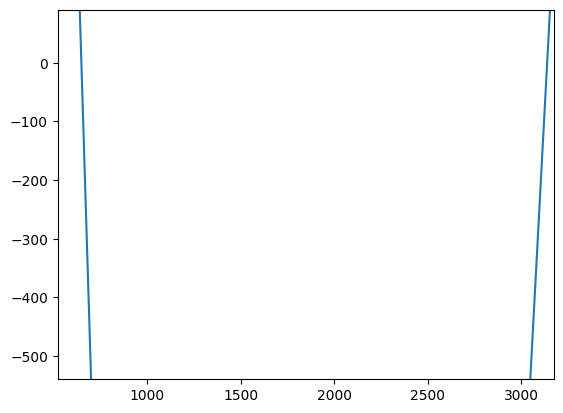

In [ ]:
for idx, (_, angle, dist) in enumerate(horizontal):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.show()

slope=-0.0261859215691872
slope=-0.034920769491747904
slope=-0.034920769491747904
slope=-0.01745506492821751
slope=-0.0261859215691872
slope=-0.0261859215691872
slope=-0.0261859215691872
slope=-0.043660942908512135
slope=-0.034920769491747904
slope=-0.01745506492821751
slope=-0.0261859215691872
slope=-0.0261859215691872
slope=-0.0261859215691872
slope=-0.0261859215691872
slope=-0.0261859215691872
slope=-0.01745506492821751
slope=-0.01745506492821751
slope=-0.0261859215691872
slope=-0.01745506492821751
slope=-0.0261859215691872
slope=-0.0261859215691872
slope=-0.034920769491747904
slope=-0.0261859215691872
slope=-0.01745506492821751
slope=-0.01745506492821751
slope=-0.01745506492821751
slope=-0.034920769491747904
slope=-0.0261859215691872
slope=-0.0261859215691872
slope=-0.034920769491747904
slope=-0.043660942908512135
slope=-0.01745506492821751
slope=-0.01745506492821751
slope=-0.01745506492821751
slope=-0.034920769491747904
slope=-0.01745506492821751
slope=-0.043660942908512135
slope=

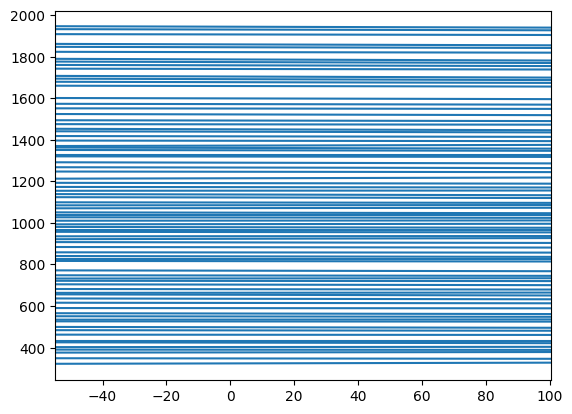

In [ ]:
for idx, (_, angle, dist) in enumerate(vertical):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))
    print(f"slope={np.tan(angle + np.pi/2)}")

plt.show()

In [ ]:
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    _, angle1, dist1 = line1
    _, angle2, dist2 = line2
    A = np.array([
        [np.cos(angle1), np.sin(angle1)],
        [np.cos(angle2), np.sin(angle2)]
    ])
    b = np.array([[dist1], [dist2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [x0, y0]


def segmented_intersections(lines):
    """Finds the intersections between groups of lines."""

    plt.imshow(image, cmap=cm.gray)

    intersections = []
    for i, group in enumerate(lines[:-1]):
        for next_group in lines[i+1:]:
            for line1 in group:
                for line2 in next_group:

                    _, angle1, dist1 = line1
                    _, angle2, dist2 = line2

                    (x01, y01) = dist1 * np.array([np.cos(angle1), np.sin(angle1)])
                    plt.axline((x01, y01), slope=np.tan(angle1 + np.pi/2), c='b')

                    (x02, y02) = dist2 * np.array([np.cos(angle2), np.sin(angle2)])
                    plt.axline((x02, y02), slope=np.tan(angle2 + np.pi/2), c='g')

                    i = intersection(line1, line2)
                    intersections.append(i)

                    if (i[0] >= 0 and i[0] <= image.shape[0]) and (i[1] >= 0 and i[1] <= image.shape[1]):
                      plt.plot(i[0], i[1], 'r+')

    plt.show()


    return intersections

<ipython-input-50-7bf390b644a6>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0, y0 = int(np.round(x0)), int(np.round(y0))


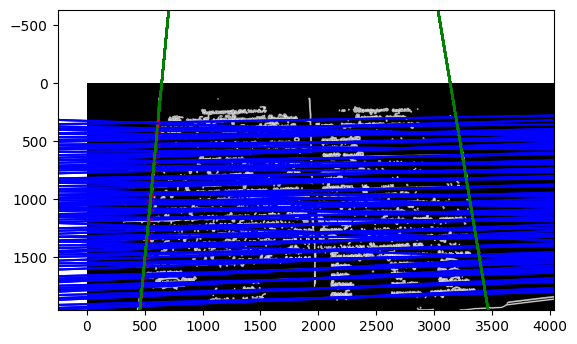

In [ ]:
intersections = segmented_intersections([vertical, horizontal])

In [ ]:
intersections

[[505, 1479],
 [3374, 1404],
 [463, 1914],
 [3442, 1810],
 [479, 1741],
 [3413, 1639],
 [601, 473],
 [3211, 427],
 [518, 1336],
 [3350, 1262],
 [568, 824],
 [3265, 754],
 [561, 892],
 [3276, 821],
 [462, 1924],
 [3439, 1794],
 [495, 1582],
 [3387, 1481],
 [556, 946],
 [3289, 899],
 [574, 755],
 [3254, 685],
 [581, 688],
 [3243, 618],
 [534, 1177],
 [3324, 1104],
 [547, 1035],
 [3300, 963],
 [497, 1559],
 [3387, 1483],
 [521, 1310],
 [3350, 1261],
 [563, 873],
 [3277, 826],
 [512, 1403],
 [3361, 1328],
 [549, 1017],
 [3301, 969],
 [587, 620],
 [3231, 551],
 [481, 1728],
 [3415, 1651],
 [487, 1660],
 [3400, 1558],
 [554, 965],
 [3289, 893],
 [595, 540],
 [3222, 494],
 [576, 737],
 [3255, 690],
 [535, 1163],
 [3325, 1114],
 [525, 1271],
 [3335, 1173],
 [526, 1253],
 [3336, 1179],
 [540, 1108],
 [3312, 1036],
 [502, 1504],
 [3374, 1404],
 [486, 1670],
 [3397, 1543],
 [589, 605],
 [3233, 559],
 [506, 1465],
 [3376, 1415],
 [528, 1237],
 [3338, 1188],
 [510, 1421],
 [3360, 1322],
 [569, 806]

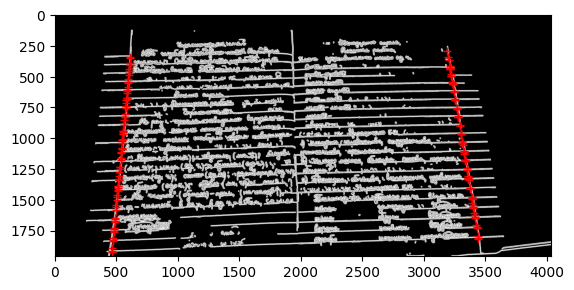

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image, cmap=cm.gray)

for idx, intersection in enumerate(intersections):
    plt.plot(intersection[0], intersection[1], 'r+')

plt.show()

In [ ]:
import math
import itertools

def polar_to_cartesian(r, theta):
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return x, y

def distance_between_points(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Define your polar coordinates
polar_lines = [(3, math.pi / 6), (4, math.pi / 3), (5, math.pi / 4)]  # Add your lines here

# Convert to Cartesian coordinates
cartesian_lines = [polar_to_cartesian(r, theta) for (_, theta, r) in vertical]

# Calculate the distance between each pair of lines
distances = [distance_between_points(x1, y1, x2, y2) for (x1, y1), (x2, y2) in itertools.combinations(cartesian_lines, 2)]

# Find the minimum distance
min_distance = min(distances)

print(f"The minimum distance between the lines is {min_distance}")

The minimum distance between the lines is 12.912018125757177


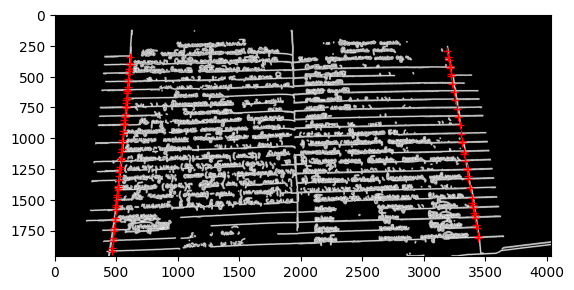

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Let's assume you have a list of intersection points
points = np.asarray(intersections)

# Define the maximum distance between two samples for them to be considered as in the same neighborhood (eps)
# and the number of samples in a neighborhood for a point to be considered as a core point (min_samples)
eps = min_distance
min_samples = 1

# Fit the DBSCAN model to your data
db = DBSCAN(eps=eps, min_samples=min_samples).fit(points)

# Get the labels of the clusters
labels = db.labels_

# Get the coordinates of the cluster centers
centroids = [points[labels == i].mean(axis=0) for i in range(max(labels) + 1)]

plt.imshow(image, cmap=cm.gray)

for idx, centroid in enumerate(centroids):
    plt.plot(centroid[0], centroid[1], 'r+')

plt.savefig('clustering.png')
plt.show()

In [ ]:
from scipy.spatial import ConvexHull
import numpy as np

def find_corners(points):
    # Calculate the convex hull of the points
    hull = ConvexHull(points)

    # Get the coordinates of the corner points
    corners = points[hull.vertices]

    # Find the top-left, top-right, bottom-right, and bottom-left corners
    top_left = min(corners, key=lambda point: point[0] + point[1])
    top_right = max(corners, key=lambda point: point[0] - point[1])
    bottom_right = max(corners, key=lambda point: point[0] + point[1])
    bottom_left = min(corners, key=lambda point: point[0] - point[1])

    return top_left, top_right, bottom_right, bottom_left

def find_corners_and_scale(points, scale_factor=1.1):
    # Calculate the convex hull of the points
    hull = ConvexHull(points)

    # Get the coordinates of the corner points
    corners = points[hull.vertices]

    # Find the top-left, top-right, bottom-right, and bottom-left corners
    top_left = min(corners, key=lambda point: point[0] + point[1])
    top_right = max(corners, key=lambda point: point[0] - point[1])
    bottom_right = max(corners, key=lambda point: point[0] + point[1])
    bottom_left = min(corners, key=lambda point: point[0] - point[1])

    # Calculate the centroid of the corner points
    centroid = np.mean([top_left, top_right, bottom_right, bottom_left], axis=0)

    # Scale the corner points
    top_left = (top_left - centroid) * scale_factor + centroid
    top_right = (top_right - centroid) * scale_factor + centroid
    bottom_right = (bottom_right - centroid) * scale_factor + centroid
    bottom_left = (bottom_left - centroid) * scale_factor + centroid

    return top_left, top_right, bottom_right, bottom_left

In [ ]:
points = np.array(intersections)
top_left, top_right, bottom_right, bottom_left = find_corners(points)
print(f"Top Left: {top_left}, Top Right: {top_right}, Bottom Right: {bottom_right}, Bottom Left: {bottom_left}")

Top Left: [614 337], Top Right: [3188  292], Bottom Right: [3443 1816], Bottom Left: [ 462 1924]


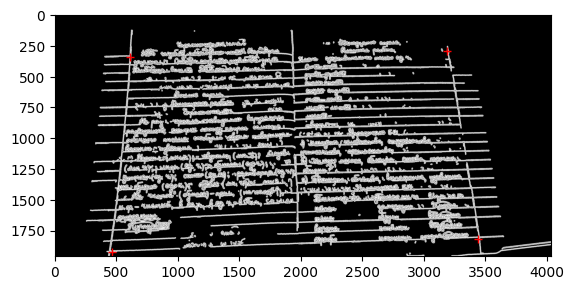

In [ ]:
plt.imshow(image, cmap=cm.gray)

for idx, centroid in enumerate([top_left, top_right, bottom_right, bottom_left]):
    plt.plot(centroid[0], centroid[1], 'r+')

plt.show()

In [ ]:
points = np.array(intersections)
top_left, top_right, bottom_right, bottom_left = find_corners_and_scale(points, scale_factor=1)
print(f"Top Left: {top_left}, Top Right: {top_right}, Bottom Right: {bottom_right}, Bottom Left: {bottom_left}")

Top Left: [614. 337.], Top Right: [3188.  292.], Bottom Right: [3443. 1816.], Bottom Left: [ 462. 1924.]


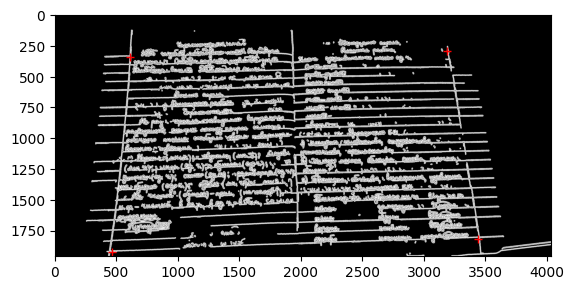

In [ ]:
plt.imshow(image, cmap=cm.gray)

for idx, centroid in enumerate([top_left, top_right, bottom_right, bottom_left]):
    plt.plot(centroid[0], centroid[1], 'r+')

plt.show()

In [ ]:
import numpy as np
import cv2

def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
      [0, 0],
      [maxWidth - 1, 0],
      [maxWidth - 1, maxHeight - 1],
      [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped, M

In [ ]:
image = cv2.imread(filename)
warped, M = four_point_transform(image, np.array([top_left, top_right, bottom_right, bottom_left]))

def get_path_last_seg(path):
  return os.path.basename(os.path.normpath(path))


with open(json_filename) as json_file:
  json_data = json.load(json_file)
  # print(json.dumps(json_data, indent=1))

category_name2id = {category['name']: category['id'] for category in json_data['categories']}
print(f"{category_name2id=}")
image_name2id = {image['file_name']: image['id'] for image in json_data['images']}
print(f"{image_name2id=}")

for annotation in json_data['annotations']:
    if annotation['image_id'] != image_name2id[get_path_last_seg(filename)]: continue

    # Polygon corner points coordinates
    pts = np.array(annotation['segmentation'], np.float32)
    pts = pts.reshape((-1, 1, 2))

    isClosed = True

    # Green color in BGR
    color = (0, 255, 0)

    # Line thickness of 8 px
    thickness = 8

    print(f"{pts=}")

    pts = cv2.perspectiveTransform(pts, M)

    print(f"{pts=}")

    # Using cv2.polylines() method
    # Draw a Green polygon with
    # thickness of 1 px
    # warped = cv2.polylines(warped, [np.int32(pts)],
                          # isClosed, color,
                          # thickness)
plt.imshow(warped)
cv2.imwrite('warped_annotated_image.jpg', warped)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/instances_default.json'

# Apply warp transformation in polygon

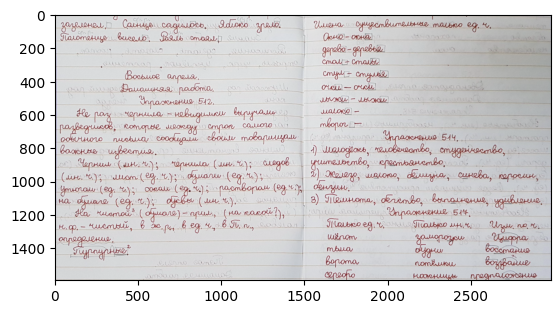

In [ ]:
image = cv2.imread(filename)
warped, M = four_point_transform(image, np.array([top_left, top_right, bottom_right, bottom_left]))
plt.imshow(warped)
cv2.imwrite('warped.jpg', warped)
plt.show()

https://docs.opencv.org/4.x/d6/d10/tutorial_py_houghlines.html - ужасно работает, доказательство ниже

In [ ]:
image = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

In [ ]:
rho, theta, thresh = 2, np.pi/180, 400
lines = cv2.HoughLines(edges, rho, theta, thresh)

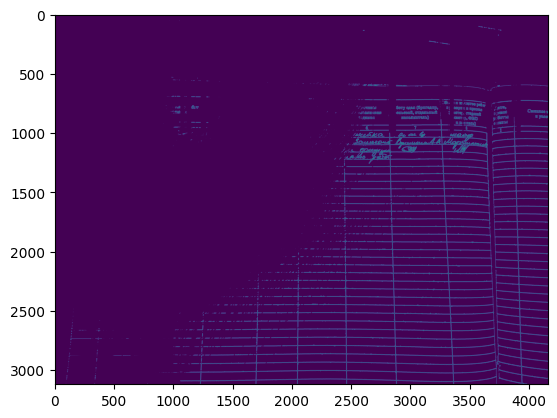

In [ ]:
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(edges, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.imshow(edges)
plt.show()

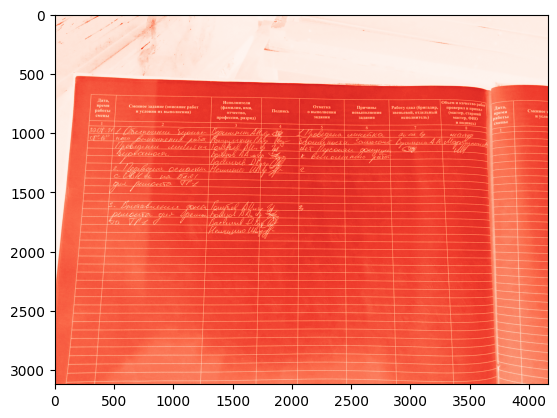

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/1700136661371.jpg')

# Split the image into Blue, Green and Red channels
b, g, r = cv2.split(img)

# Now 'b' is your blue-channel image
plt.imshow(r, cmap='Reds')
plt.show()

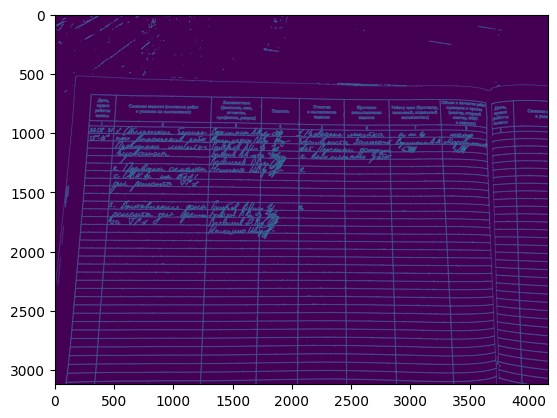

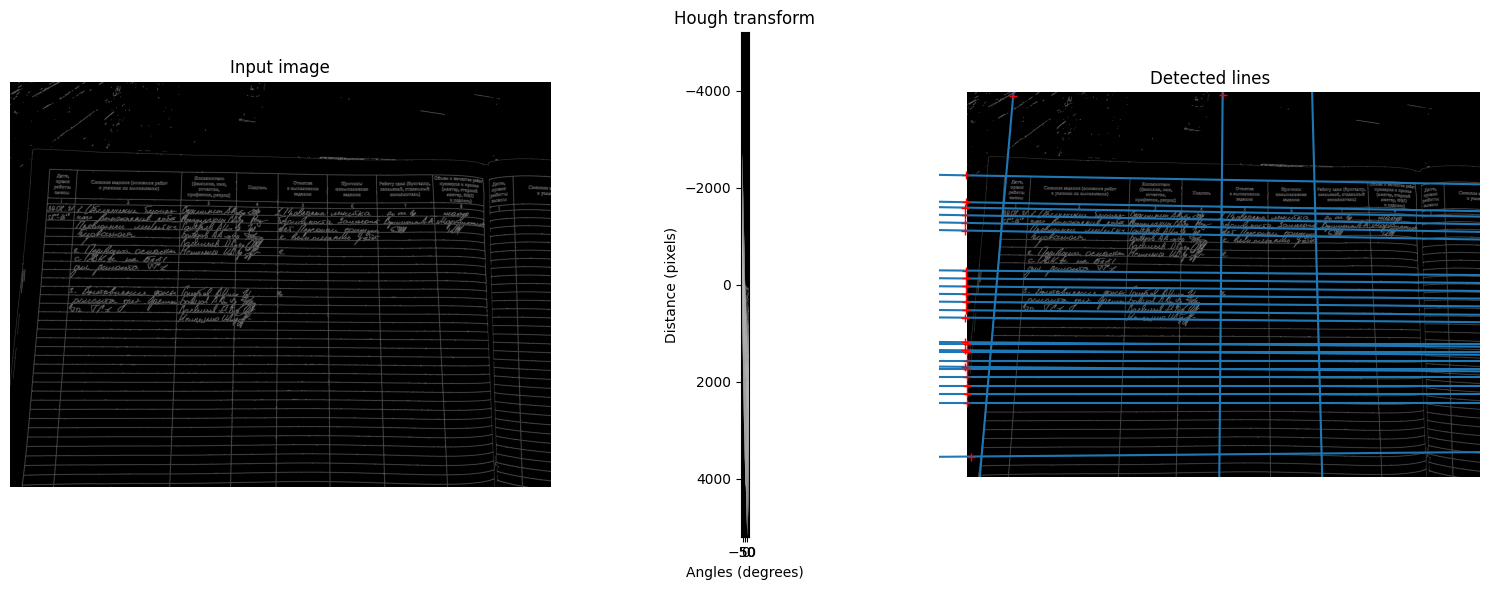

In [ ]:
# thresh = cv2.adaptiveThreshold(b, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 32)
thresh = cv2.adaptiveThreshold(b, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
image = cv2.Canny(gray,50,150,apertureSize = 3)
plt.imshow(image)
plt.show()

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for idx, (_, angle, dist) in enumerate(zip(*hough_line_peaks(h, theta, d))):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))
    # plotting point
    ax[2].plot(x0, y0, 'r+')

plt.tight_layout()
plt.savefig('output2.png')
plt.show()